# Concept code for filtering a dataset using Fourier and plots in section Fourier filtering of the report

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq, rfft, irfft, fftfreq, fft
import scipy
import math
from scipy.ndimage import gaussian_filter1d
import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
dfAA = pd.read_excel('../../01 - Raw Data/data_AA.xlsx')

##### plots the raw dataset AA

Text(0.5, 0, 'Date')

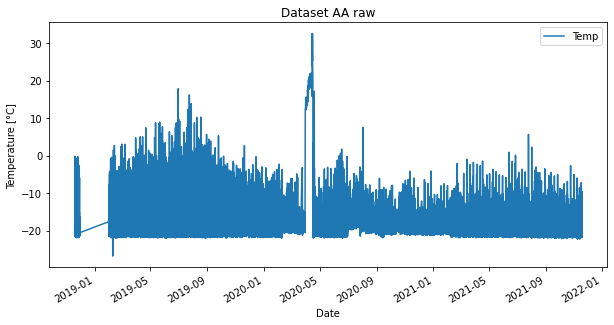

In [3]:
dfAA.plot(x='EventDt', y='Temp', figsize=(10,5))
plt.title('Dataset AA raw')
plt.ylabel('Temperature [°C]')
plt.xlabel('Date')

##### filters outlier peak manually

In [4]:
dfAA_out = dfAA.drop(dfAA.index[125100:131100])

##### plot snip (n=1000) dataset AA

Text(0.5, 0, 'Date')

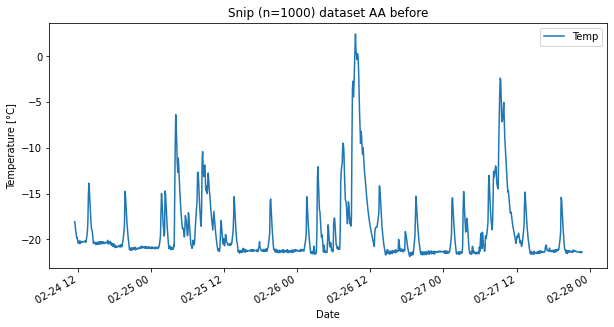

In [5]:
dfAA_out[10000:11000].plot(x='EventDt', y='Temp', figsize=(10,5))
plt.title('Snip (n=1000) dataset AA before')
plt.ylabel('Temperature [°C]')
plt.xlabel('Date')

##### compute and plot Fourier transform of dataset AA, including manually computed threshold function, and filter peaks above the threshold function

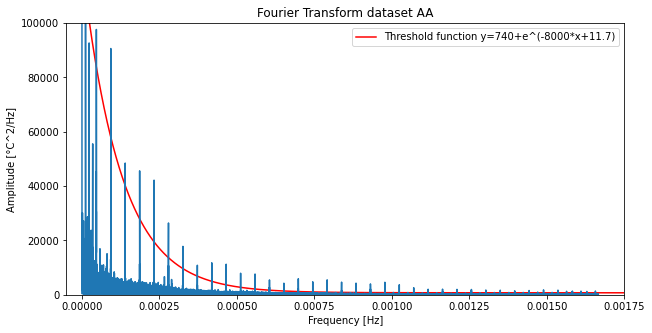

In [14]:
N = len(dfAA_out)

yf = rfft(np.array(dfAA_out['Temp']))
xf = rfftfreq(N, 1 / (1/300)) 
x = np.linspace(0, 0.002, len(xf))
y = 740+np.exp(-8000*x+11.7)
border = y

peaks = scipy.signal.find_peaks(np.abs(yf), height=border, threshold=None, distance=None, prominence=None, width=None, wlen=None, rel_height=0.5, plateau_size=None)

#filter out 3 indices around the peaks
cut_f_signal = yf.copy()
for i in range(1, len(peaks[0])-5):
    cut_f_signal[(xf==xf[peaks[0][i]-1])] = 0
    cut_f_signal[(xf==xf[peaks[0][i]])] = 0
    cut_f_signal[(xf==xf[peaks[0][i]+1])] = 0
cut_signal = irfft(cut_f_signal)

dfAA_out['Temp - frequencies above threshold'] = cut_signal

plt.figure(figsize=(10,5))

plt.plot(x, y, color='red', label='Threshold function y=740+e^(-8000*x+11.7)')

plt.plot(xf, np.abs(yf))
plt.ylim((0,0.10*10**6))
plt.xlim( -0.00005,0.001751)
plt.title("Fourier Transform dataset AA")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [°C^2/Hz]")
plt.legend()
# plt.savefig('DFT AA threshold.png', bbox_inches='tight')
plt.show()

##### plot snip (n=1000) dataset AA after Fourier filtering

Text(0.5, 0, 'Date')

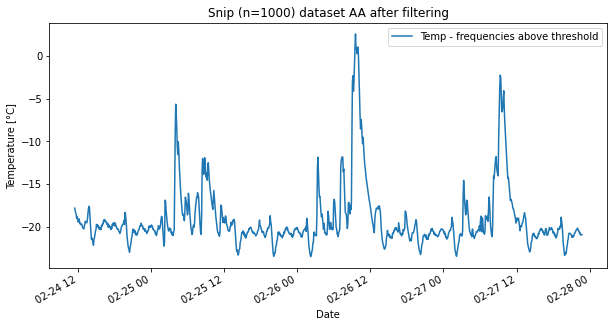

In [21]:
dfAA_out[10000:11000].plot(x='EventDt', y= 'Temp - frequencies above threshold', figsize=(10,5))
plt.title('Snip (n=1000) dataset AA after filtering')
plt.ylabel('Temperature [°C]')
plt.xlabel('Date')
# plt.savefig('snip AA 1000 filter.png', bbox_inches='tight')

##### compute the difference between original data and data after Fourier filtering and plot snip (n=1000) dataset AA of the difference

Text(0.5, 0, 'Date')

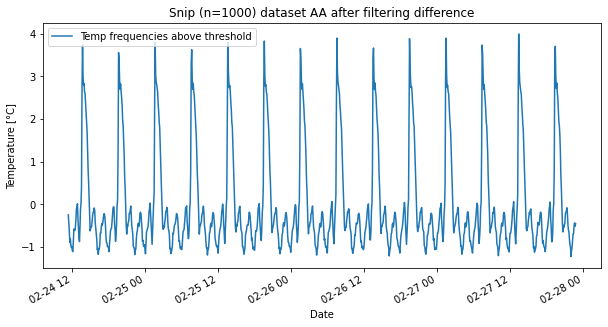

In [12]:
dfAA_out['Temp frequencies above threshold'] = dfAA_out['Temp'] - dfAA_out['Temp - frequencies above threshold']
dfAA_out[10000:11000].plot(x='EventDt', y= 'Temp frequencies above threshold', figsize=(10,5))
plt.title('Snip (n=1000) dataset AA after filtering difference')
plt.ylabel('Temperature [°C]')
plt.xlabel('Date')
# plt.savefig('snip AA 1000 difference.png', bbox_inches='tight')